# Классификация изображений с помощью сверточной нейронной сети

Построим свёрточную нейронную сеть для классификации изображений на основе датасета Intel Image Classification.

In [114]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [115]:
data_dir = "seg_train/seg_train"
test_data_dir = "seg_test/seg_test"

In [116]:
dataset = ImageFolder(data_dir, transform = transforms.Compose([
    transforms.Resize((150, 150)), transforms.ToTensor()
]))
test_dataset = ImageFolder(test_data_dir, transforms.Compose([
    transforms.Resize((150, 150)), transforms.ToTensor()
]))

In [117]:
img, label = dataset[0]
print(img.shape, label)

torch.Size([3, 150, 150]) 0


In [118]:
print("Классы изображений : \n", dataset.classes)

Классы изображений : 
 ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


Label (class): buildings


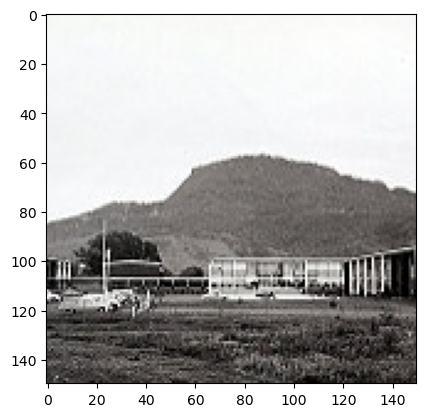

In [119]:
def display_img(img, label):
    print(f"Label (class): {dataset.classes[label]}")
    plt.imshow(img.permute(1, 2, 0))
    
display_img(*dataset[0])

In [120]:
import torch.nn as nn

class ConvNet(nn.Module):
	def __init__(self, numChannels, classes):
		super(ConvNet, self).__init__()
		# CNN 1:
		self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=64, kernel_size=(3, 3), padding=(1, 1))
		self.batchnorm1 = nn.BatchNorm2d(64)
		self.relu1 = nn.ReLU()
		self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		
		# CNN 2:
		self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=(1, 1))
		self.conv2_2 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), padding=(1, 1))
		self.batchnorm2 = nn.BatchNorm2d(128)
		self.relu2 = nn.ReLU()
		self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		
		# CNN 3:
		self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), padding=(1, 1))
		self.conv3_2 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), padding=(1, 1))
		self.conv3_3 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), padding=(1, 1))
		self.batchnorm3 = nn.BatchNorm2d(256)
		self.relu3 = nn.ReLU()
		self.maxpool3 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		
		# CNN 4:
		self.conv4 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3, 3), padding=(1, 1))
		self.conv4_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), padding=(1, 1))
		self.conv4_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), padding=(1, 1))
		self.batchnorm4 = nn.BatchNorm2d(512)
		self.relu4 = nn.ReLU()
		self.maxpool4 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		
		# CNN 5:
		self.conv5 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), padding=(1, 1))
		self.conv5_2 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), padding=(1, 1))
		self.conv5_3 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=(3, 3), padding=(1, 1))
		self.batchnorm5 = nn.BatchNorm2d(512)
		self.relu5 = nn.ReLU()
		self.maxpool5 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		
		# FC 1:
		self.fc1 = nn.Linear(in_features=8192, out_features=2048)
		self.relu4 = nn.ReLU()
		self.dropout1 = nn.Dropout(p=0.5)
		
		# FC 2:
		self.fc2 = nn.Linear(in_features=2048, out_features=512)
		self.relu5 = nn.ReLU()
		self.dropout2 = nn.Dropout(p=0.5)
		
		# SOFTMAX:
		self.fc3 = nn.Linear(in_features=512, out_features=classes)
		self.logSoftmax = nn.LogSoftmax(dim=1)

	def forward(self, x):
		x = self.conv1(x)
		x = self.batchnorm1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)
		
		x = self.conv2(x)
		# x = self.conv2_2(x)
		x = self.batchnorm2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)

		x = self.conv3(x)
		# x = self.conv3_2(x)
		# x = self.conv3_3(x)
		x = self.batchnorm3(x)
		x = self.relu3(x)
		x = self.maxpool3(x)		

		x = self.conv4(x)
		# x = self.conv4_2(x)
		# x = self.conv4_3(x)
		x = self.batchnorm4(x)
		x = self.relu4(x)
		x = self.maxpool4(x)

		x = self.conv5(x)
		# x = self.conv5_2(x)
		# x = self.conv5_3(x)
		x = self.batchnorm5(x)
		x = self.relu5(x)
		x = self.maxpool5(x)

		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = self.relu4(x)
		x = self.dropout1(x)
	
		x = self.fc2(x)
		x = self.relu5(x)	
		x = self.dropout2(x)

		x = self.fc3(x)
		output = self.logSoftmax(x)
		return output

In [121]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

BATCH_SIZE = 32
INIT_LR = 0.05
EPOCHS = 40
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT

train_size = int(len(dataset) * TRAIN_SPLIT)
val_size = len(dataset) - train_size 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_data, val_data = random_split(dataset, [train_size, val_size])
print(f"Размер обучающих данных: {len(train_data)}")
print(f"Размер валидационных данных : {len(val_data)}")

train_dl = DataLoader(train_data, BATCH_SIZE, shuffle=True, num_workers=0)
val_dl = DataLoader(val_data, BATCH_SIZE, num_workers=0)
test_dl = DataLoader(test_dataset, batch_size=BATCH_SIZE)

train_steps = len(train_dl.dataset) // BATCH_SIZE
val_steps = len(val_dl.dataset) // BATCH_SIZE

Размер обучающих данных: 10525
Размер валидационных данных : 3509


In [122]:
from torch.optim import SGD
import time

model = ConvNet(
	numChannels=3,
	classes=len(dataset.classes)).to(device)

opt = SGD(model.parameters(), lr=INIT_LR)
loss_fn = nn.NLLLoss()

H = {
	"train_loss": [],
	"train_acc": [],
	"val_loss": [],
	"val_acc": []
}

In [123]:
start_time = time.time()

for e in range(0, EPOCHS):
	model.train()
	total_train_loss = 0
	total_val_loss = 0
	train_correct = 0
	val_correct = 0

	for (x, y) in train_dl:
		(x, y) = (x.to(device), y.to(device))
		pred = model(x)
		loss = loss_fn(pred, y)
		opt.zero_grad()
		loss.backward()
		opt.step()
		total_train_loss += loss
		train_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

	with torch.no_grad():
		model.eval()
		for (x, y) in val_dl:
			(x, y) = (x.to(device), y.to(device))
			pred = model(x)
			total_val_loss += loss_fn(pred, y)
			val_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

	avg_train_loss = total_train_loss / train_steps
	avg_val_loss = total_val_loss / val_steps
	train_correct = train_correct / len(train_dl.dataset)
	val_correct = val_correct / len(val_dl.dataset)
	
	val_acc_prev = H["val_acc"][-1] if len(H["val_acc"]) > 0 else 0
	val_acc_prev_prev = H["val_acc"][-2] if len(H["val_acc"]) > 1 else 0

	H["train_loss"].append(avg_train_loss.cpu().detach().numpy())
	H["train_acc"].append(train_correct)
	H["val_loss"].append(avg_val_loss.cpu().detach().numpy())
	H["val_acc"].append(val_correct)

	print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
	print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(avg_train_loss, train_correct))
	print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(avg_val_loss, val_correct))
	
	torch.save(model.state_dict(), f"model_{e + 1}.pth")
		
end_time = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(end_time - start_time))                     

[INFO] EPOCH: 1/40
Train loss: 0.968630, Train accuracy: 0.6341
Val loss: 1.652393, Val accuracy: 0.4691

[INFO] EPOCH: 2/40
Train loss: 0.678351, Train accuracy: 0.7649
Val loss: 1.232858, Val accuracy: 0.5785

[INFO] EPOCH: 3/40
Train loss: 0.578699, Train accuracy: 0.7931
Val loss: 0.960500, Val accuracy: 0.6785

[INFO] EPOCH: 4/40
Train loss: 0.496214, Train accuracy: 0.8273
Val loss: 0.899799, Val accuracy: 0.7127

[INFO] EPOCH: 5/40
Train loss: 0.469289, Train accuracy: 0.8371
Val loss: 0.685386, Val accuracy: 0.7367

[INFO] EPOCH: 6/40
Train loss: 0.426489, Train accuracy: 0.8569
Val loss: 0.980612, Val accuracy: 0.6956

[INFO] EPOCH: 7/40
Train loss: 0.394209, Train accuracy: 0.8609
Val loss: 0.455626, Val accuracy: 0.8421

[INFO] EPOCH: 8/40
Train loss: 0.354221, Train accuracy: 0.8767
Val loss: 0.385734, Val accuracy: 0.8649

[INFO] EPOCH: 9/40
Train loss: 0.338074, Train accuracy: 0.8822
Val loss: 0.629579, Val accuracy: 0.7771

[INFO] EPOCH: 10/40
Train loss: 0.300085, Trai

In [128]:
from sklearn.metrics import classification_report
import numpy as np

model.load_state_dict(torch.load(f"model_11.pth"))

with torch.no_grad():
	model.eval()
	
	preds = []
	for (x, y) in test_dl:
		x = x.to(device)
		pred = model(x)
		preds.extend(pred.argmax(axis=1).cpu().numpy())

print(classification_report(test_dataset.targets, np.array(preds), target_names=test_dataset.classes))

              precision    recall  f1-score   support

   buildings       0.80      0.89      0.84       437
      forest       0.96      0.97      0.96       474
     glacier       0.90      0.76      0.82       553
    mountain       0.86      0.81      0.83       525
         sea       0.83      0.93      0.88       510
      street       0.86      0.87      0.87       501

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



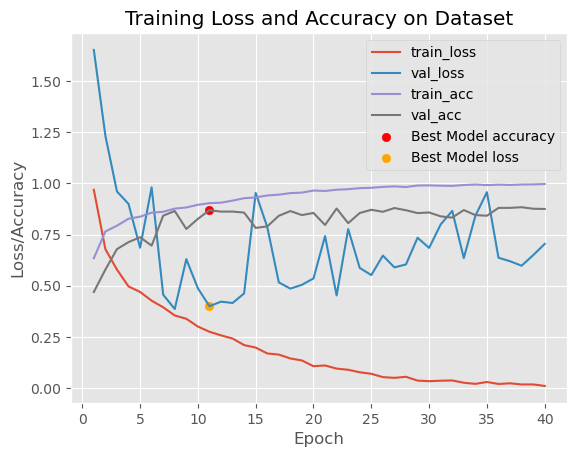

In [136]:
plt.style.use("ggplot")
plt.figure()
plt.plot(range(1, EPOCHS + 1), H["train_loss"], label="train_loss")
plt.plot(range(1, EPOCHS + 1), H["val_loss"], label="val_loss")
plt.plot(range(1, EPOCHS + 1), H["train_acc"], label="train_acc")
plt.plot(range(1, EPOCHS + 1), H["val_acc"], label="val_acc")
plt.scatter([11], [H["val_acc"][10]], color="red", label="Best Model accuracy")
plt.scatter([11], [H["val_loss"][10]], color="orange", label="Best Model loss")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

torch.save(model, "cnn.pt")

Напишем функцию, выполняющую предсказание класса для входного изображения. На вход функция принимает имя файла, а возвращает предсказанный класс.

In [174]:
from PIL import Image

def predict_class(filename, model, classes=dataset.classes):
	image = Image.open(filename)
	image = transforms.Compose([
		transforms.Resize((150, 150)),
		transforms.ToTensor(),
	])(image).unsqueeze(0)
	image = image.to(device)
	prediction = model(image)
	prediction = prediction.argmax().item()
	return classes[prediction]

model = torch.load("cnn.pt")
predict_class("seg_pred/seg_pred/3.jpg", model)

'street'

Сравним с предсказанием, полученным с помощью предобученной модели AlexNet.

In [175]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.to(device)
model.eval()

with open("imagenet_classes.txt", "r") as f:
	categories = [s.strip() for s in f.readlines()]

predict_class("seg_pred/seg_pred/103.jpg", model, categories)

Using cache found in C:\Users\bred7/.cache\torch\hub\pytorch_vision_v0.10.0


'triumphal arch'